In [5]:
"""
重力（含噪声）向上延拓
"""
# 3rd imports
import matplotlib.pyplot as plt
# local imports
from geoist import gridder
from geoist.inversion import geometry
from geoist.pfm import prism, pftrans, giutils
from geoist.vis import giplt

In [6]:
#模型设置
model = [
    geometry.Prism(-3000, -2000, -3000, -2000, 500, 2000, {'density': 1000}),
    geometry.Prism(-1000, 1000, -1000, 1000, 0, 2000, {'density': -800}),
    geometry.Prism(1000, 3000, 2000, 3000, 0, 1000, {'density': 900})]
area = (-5000, 5000, -5000, 5000)
shape = (50, 50)
z0 = -100
x, y, z = gridder.regular(area, shape, z=z0)
#正演及添加噪声
gz = giutils.contaminate(prism.gz(x, y, z, model), 0.5, seed=0)


In [7]:
#延拓高度1000m
height = 1000  # How much higher to go
#延拓异常计算
gzcontf = pftrans.upcontinue(x, y, gz, shape, height)

In [8]:
# 计算延拓高度处的正演
gztrue = prism.gz(x, y, z - height, model)

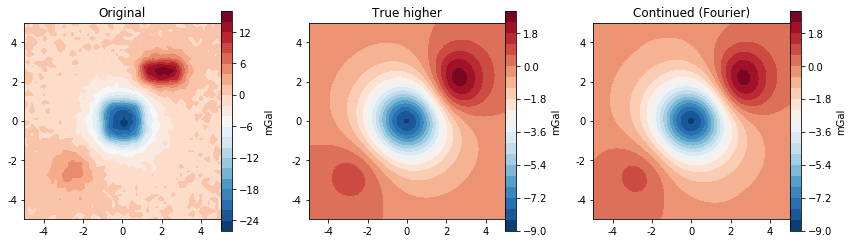

In [9]:
#画图
args = dict(shape=shape, levels=20, cmap=plt.cm.RdBu_r)
fig, axes = plt.subplots(1, 3, figsize=(12, 3.5))
axes = axes.ravel()
plt.sca(axes[0])
plt.title("Original")
plt.axis('scaled')
giplt.contourf(x, y, gz, **args)
plt.colorbar(pad=0).set_label('mGal')
giplt.m2km()
plt.sca(axes[1])
plt.title('True higher')
plt.axis('scaled')
giplt.contourf(y, x, gztrue, **args)
plt.colorbar(pad=0).set_label('mGal')
giplt.m2km()
plt.sca(axes[2])
plt.title("Continued (Fourier)")
plt.axis('scaled')
giplt.contourf(y, x, gzcontf, **args)
plt.colorbar(pad=0).set_label('mGal')
giplt.m2km()
plt.tight_layout()
plt.show()
